# Classification & Regression with Trees

**Aim**: The aim of this notebook is to provide code-based examples for the implementation of tree based algorithms using scikit-learn. 

## Table of contents 

1. Decision Tree Classifier
2. Random Forest Classifier
3. AdaBoost Classifier
4. Decision Tree Regressor
5. Random Forest Regressor
6. Gradient Boosted Trees Regressor 
7. Ensemble Classifier

## Package Requirements

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree

## Decision Tree Classifier

**Reading in the dataset**

In [58]:
df = pd.read_csv('fraud_prediction.csv')

In [59]:
df = df.drop(['Unnamed: 0'], axis = 1)

**Splitting the data into training & test sets**

In [60]:
#Creating the features 

features = df.drop('isFraud', axis = 1).values
target = df['isFraud'].values

In [61]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42, 
                                                    stratify = target)

**Building the initial decision tree classifier**

In [62]:
#Initializing the DT classifier

dt = DecisionTreeClassifier(criterion = 'gini', random_state = 50)

#Fitting on the training data

dt.fit(X_train, y_train)

#Testing accuracy on the test data

dt.score(X_test, y_test)

0.99611947318908745

**Hyper-parameter Optimization**

In [63]:
#Creating a grid of different hyper-parameters

grid_params = {
    'max_depth': [1,2,3,4,5,6],
    'min_samples_leaf': [0.02,0.04, 0.06, 0.08]
}

#Building a 10 fold Cross Validated GridSearchCV object

grid_object = GridSearchCV(estimator = dt, param_grid = grid_params, scoring = 'accuracy', cv = 10, n_jobs = -1)

In [64]:
#Fitting the grid to the training data

grid_object.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=50,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6], 'min_samples_leaf': [0.02, 0.04, 0.06, 0.08]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [65]:
#Extracting the best parameters

grid_object.best_params_

{'max_depth': 1, 'min_samples_leaf': 0.02}

In [66]:
#Extracting the best model

dt = grid_object.best_estimator_

**Visualizing the decision tree**

In [67]:
#Reading in the data

df = pd.read_csv('fraud_prediction.csv')
df = df.drop(['Unnamed: 0'], axis = 1)

#Creating the features 

features = df.drop('isFraud', axis = 1).values
target = df['isFraud'].values

In [68]:
#Initializing the DT classifier

dt = DecisionTreeClassifier(criterion = 'gini', random_state = 50, max_depth= 5)

In [69]:
#Fitting the classifier on the data

dt.fit(features, target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=50,
            splitter='best')

In [70]:
#Extracting the feature names

feature_names = df.drop('isFraud', axis = 1)

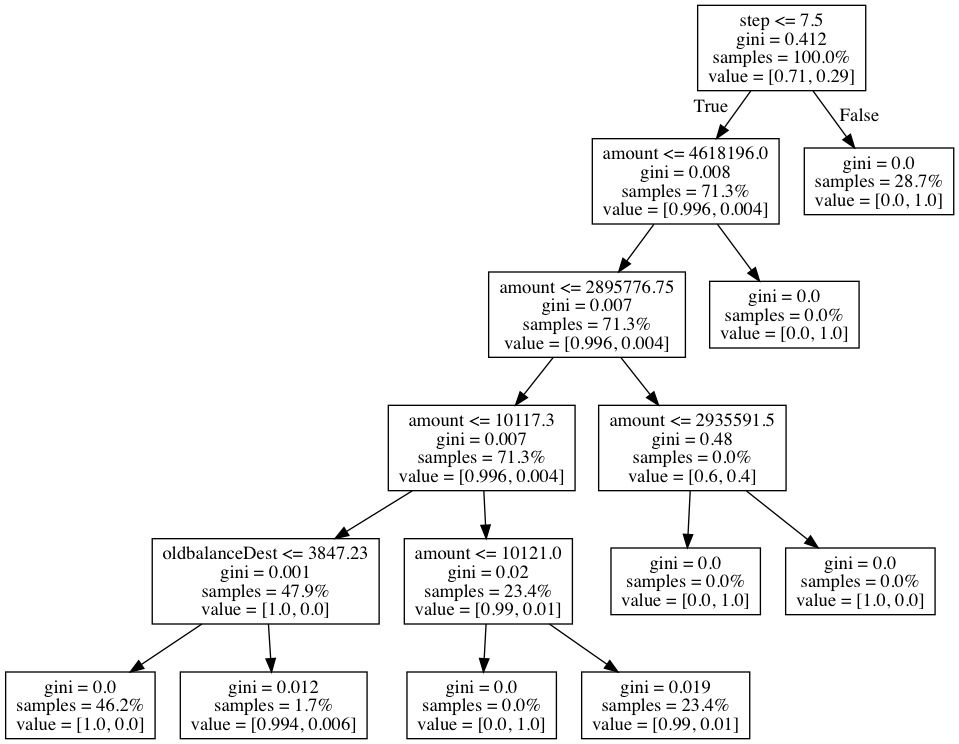

In [71]:
#Creating the tree visualization

data = tree.export_graphviz(dt, out_file=None, feature_names= feature_names.columns.values, proportion= True)

graph = pydotplus.graph_from_dot_data(data) 

# Show graph
Image(graph.create_png())

## Random Forest Classifier

In [72]:
#Reading in the dataset

df = pd.read_csv('fraud_prediction.csv')

#Dropping the index

df = df.drop(['Unnamed: 0'], axis = 1)

**Splitting the data into training and test sets**

In [73]:
#Creating the features 

features = df.drop('isFraud', axis = 1).values
target = df['isFraud'].values

In [74]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42, 
                                                    stratify = target)

In [75]:
#Initiliazing an Random Forest Classifier with default parameters

rf_classifier = RandomForestClassifier(random_state = 50)

#Fitting the classifier on the training data

rf_classifier.fit(X_train, y_train)

#Extracting the scores

rf_classifier.score(X_test, y_test)

0.99764816556914393

**Hyper-parameter tuning**

In [76]:
#Creating a grid of different hyper-parameters

grid_params = {
    'n_estimators': [300,400,500],
    'max_depth': [1,2,3],
    'min_samples_leaf': [0.05, 0.1, 0.2]
}

#Building a 3 fold Cross-Validated GridSearchCV object

grid_object = GridSearchCV(estimator = rf_classifier, param_grid = grid_params, scoring = 'accuracy', 
                           cv = 3, n_jobs = -1)

In [77]:
#Fitting the grid to the training data

grid_object.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=50, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [300, 400, 500], 'max_depth': [1, 2, 3], 'min_samples_leaf': [0.05, 0.1, 0.2]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [78]:
#Extracting the best parameters

grid_object.best_params_

{'max_depth': 3, 'min_samples_leaf': 0.05, 'n_estimators': 400}

In [79]:
#Extracting the best model

rf_best = grid_object.best_estimator_

## Adaboost Classifier

In [80]:
#Reading in the dataset

df = pd.read_csv('fraud_prediction.csv')

#Dropping the index

df = df.drop(['Unnamed: 0'], axis = 1)

**Splitting the data into training & testing sets**

In [81]:
#Creating the features 

features = df.drop('isFraud', axis = 1).values
target = df['isFraud'].values

In [82]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42, 
                                                    stratify = target)

**Building the AdaBoost Classifier**

In [83]:
#Initialize a tree (Decision Tree with max depth = 1)

dt = DecisionTreeClassifier(max_depth=1, random_state = 42)

In [84]:
#Initialize an AdaBoost classifier with the tree as the base estimator

ada_boost = AdaBoostClassifier(base_estimator = dt, n_estimators=100)

In [85]:
#Fitting the AdaBoost classifier to the training set

ada_boost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=None)

In [86]:
#Extracting the accuracy scores from the classifier

ada_boost.score(X_test, y_test)

0.99788334901222953

**Hyper-paramter tuning**

In [87]:
#Creating a grid of hyper-parameters

grid_params = {
    'n_estimators': [100,200,300]
}

#Building a 3 fold CV GridSearchCV object

grid_object = GridSearchCV(estimator = ada_boost, param_grid = grid_params, scoring = 'accuracy', cv = 3, n_jobs = -1)

In [88]:
#Fitting the grid to the training data

grid_object.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
          learning_rate=1.0, n_estimators=100, random_state=None),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [89]:
#Extracting the best parameters

grid_object.best_params_

{'n_estimators': 100}

In [90]:
#Extracting the best model

ada_best = grid_object.best_estimator_

## Decision Tree Regressor 

In [91]:
#Reading in the dataset

df = pd.read_csv('fraud_prediction.csv')

#Dropping the index

df = df.drop(['Unnamed: 0'], axis = 1)

In [92]:
#Creating the features 

features = df.drop('amount', axis = 1).values
target = df['amount'].values

In [93]:
#Splitting the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)

In [94]:
#Building the decison tree regressor 

dt_reg = DecisionTreeRegressor(max_depth = 10, min_samples_leaf = 0.2, random_state= 50)

In [95]:
#Fitting the tree to the training data

dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=0.2,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=50, splitter='best')

**Visualizing the decision tree**

In [96]:
#Extracting the feature names

feature_names = df.drop('amount', axis = 1)

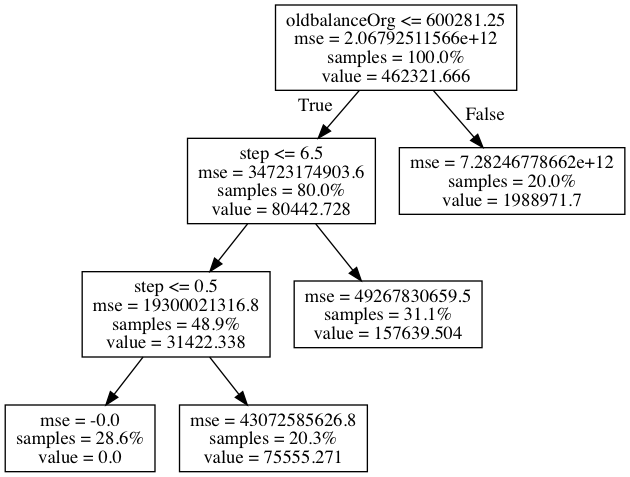

In [97]:
#Creating the tree visualization

data = tree.export_graphviz(dt_reg, out_file=None, feature_names= feature_names.columns.values, proportion= True)

graph = pydotplus.graph_from_dot_data(data) 

# Show graph
Image(graph.create_png())

## Random Forest Regressor 

In [98]:
#Reading in the dataset

df = pd.read_csv('fraud_prediction.csv')

#Dropping the index

df = df.drop(['Unnamed: 0'], axis = 1)

In [99]:
#Creating the features 

features = df.drop('amount', axis = 1).values
target = df['amount'].values

In [100]:
#Splitting the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)

In [101]:
#Initiliazing an Random Forest Regressor with default parameters

rf_reg = RandomForestRegressor(max_depth = 10, min_samples_leaf = 0.2, random_state = 50)

#Fitting the Regressor on the training data

rf_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=0.2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=50, verbose=0, warm_start=False)

## Gradient Boosted Trees for regression

In [102]:
#Reading in the dataset

df = pd.read_csv('fraud_prediction.csv')

#Dropping the index

df = df.drop(['Unnamed: 0'], axis = 1)

In [103]:
#Creating the features 

features = df.drop('amount', axis = 1).values
target = df['amount'].values

In [104]:
#Splitting the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)

**Building the Gradient Boosted Regressor**

In [105]:
#Initiliazing an Gradient Boosted Regressor with default parameters

gb_reg = GradientBoostingRegressor(max_depth = 5, n_estimators = 100, learning_rate = 0.1, random_state = 50)

#Fitting the regressor on the training data

gb_reg.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=50,
             subsample=1.0, verbose=0, warm_start=False)

In [106]:
#Creating the features 

features = df.drop('isFraud', axis = 1).values
target = df['isFraud'].values

In [107]:
#Splitting the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)

## Ensemble Classifier

In [108]:
#Reading in the dataset

df = pd.read_csv('fraud_prediction.csv')

#Dropping the index

df = df.drop(['Unnamed: 0'], axis = 1)

#Splitting the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)

**Building the DT & RF classifier to include in the Voting Classifier**

In [109]:
#Initializing the DT classifier

dt = DecisionTreeClassifier(criterion = 'gini', random_state = 50)

#Fitting on the training data

dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=50,
            splitter='best')

In [110]:
#Initiliazing an Random Forest Classifier with default parameters

rf_classifier = RandomForestClassifier(random_state = 50)

#Fitting the classifier on the training data

rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=50, verbose=0, warm_start=False)

In [111]:
#Creating a list of models

models = [('Decision Tree', dt), ('Random Forest', rf_classifier)]

In [112]:
#Initialize a voting classifier 

voting_model = VotingClassifier(estimators = models)

#Fitting the model to the training data

voting_model.fit(X_train, y_train)

#Evaluating the accuracy on the test data

voting_model.score(X_test, y_test)

0.99776575729068673